In [227]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()
init_notebook_mode(connected=True)

In [228]:
all_data=pd.read_csv('base.csv')

In [229]:
all_data.head()

,judet,totalsomeridincare:,farastudii,invatamantprimar,invatamantgimnazial,invatamantliceal,invatamantposticeal,invatamantprofesional/artesimeserii,invatamantuniversitar,origin,...,origin.2,judet.3,total,sub25ani,2529ani,3039ani,4049ani,5055ani,peste55ani,origin.3
0,alba,5690,704,775,1670,1283,44,946.0,268,18-08-educatie,...,18-08-rata,alba,5690,689,331,1125,1579,922,1044,18-08-varsta
1,arad,2859,0,1102,896,434,25,208.0,194,18-08-educatie,...,18-08-rata,arad,2859,286,123,413,760,503,774,18-08-varsta
2,arges,8822,893,2240,2891,1204,74,1166.0,354,18-08-educatie,...,18-08-rata,arges,8822,1014,538,1753,2464,1521,1532,18-08-varsta
3,bacau,12947,1984,2878,2450,2162,126,2933.0,414,18-08-educatie,...,18-08-rata,bacau,12947,1785,1981,2249,2363,2340,2229,18-08-varsta
4,bihor,4144,716,823,818,861,84,419.0,423,18-08-educatie,...,18-08-rata,bihor,4144,714,261,863,1095,669,542,18-08-varsta


In [230]:
all_data[all_data == '-'].dropna(how='all').dropna(axis=1, how='all')
# nu e NaN fiindca e un null value in dataframe e acolo fiindca nu era o valoare egala cu caracterul "-"

,farastudii,invatamantposticeal
2204,-,NaN
2221,-,-


In [231]:
for index, row in all_data.iterrows():
    for column, value in row.items():
        if pd.isna(value):
            print(f"Row: {index}, Column: {column}, Value: {value}")

In [232]:
all_data[2203:2206][['farastudii','invatamantposticeal']]

,farastudii,invatamantposticeal
2203,237,13
2204,-,70
2205,872,86


In [233]:
all_data[2220:2223]

,judet,totalsomeridincare:,farastudii,invatamantprimar,invatamantgimnazial,invatamantliceal,invatamantposticeal,invatamantprofesional/artesimeserii,invatamantuniversitar,origin,...,origin.2,judet.3,total,sub25ani,2529ani,3039ani,4049ani,5055ani,peste55ani,origin.3
2220,teleorman,2487,341,645,508,607,55,327.0,345,23-01-educatie,...,23-01-rata,teleorman,9362,1243,692,1462,2216,1925,1824,23-01-varsta
2221,timis,3020,-,277,1339,804,-,508.0,92,23-01-educatie,...,23-01-rata,timis,2487,274,144,438,655,437,539,23-01-varsta
2222,tulcea,9175,460,2671,4108,967,57,1279.0,93,23-01-educatie,...,23-01-rata,tulcea,3020,596,337,442,516,585,544,23-01-varsta


In [234]:
all_data['invatamantposticeal']=all_data['invatamantposticeal'].apply(lambda x : x.replace('-','0'))
all_data['farastudii']=all_data['farastudii'].apply(lambda x : x.replace('-','0'))


In [235]:
all_data[2220:2223]

,judet,totalsomeridincare:,farastudii,invatamantprimar,invatamantgimnazial,invatamantliceal,invatamantposticeal,invatamantprofesional/artesimeserii,invatamantuniversitar,origin,...,origin.2,judet.3,total,sub25ani,2529ani,3039ani,4049ani,5055ani,peste55ani,origin.3
2220,teleorman,2487,341,645,508,607,55,327.0,345,23-01-educatie,...,23-01-rata,teleorman,9362,1243,692,1462,2216,1925,1824,23-01-varsta
2221,timis,3020,0,277,1339,804,0,508.0,92,23-01-educatie,...,23-01-rata,timis,2487,274,144,438,655,437,539,23-01-varsta
2222,tulcea,9175,460,2671,4108,967,57,1279.0,93,23-01-educatie,...,23-01-rata,tulcea,3020,596,337,442,516,585,544,23-01-varsta


In [236]:
print(type(all_data['invatamantposticeal'][0]))
print(type(all_data['farastudii'][0]))
# all_data['invatamantposticeal']=all_data['invatamantposticeal'].astype(int)
# all_data['farastudii']=all_data['farastudii'].astype(int)
# print(type(all_data['invatamantposticeal'][0]))
# print(type(all_data['farastudii'][0]))

<class 'str'>
<class 'str'>


In [237]:
list_of_numbered_columns= ['farastudii','totalsomeridincare:', 'invatamantprimar',
       'invatamantgimnazial', 'invatamantliceal', 'invatamantposticeal',
       'invatamantprofesional/artesimeserii', 'invatamantuniversitar', 'numartotalsomeri', 'numartotalsomerifemei',
       'numartotalsomeribarbati', 'numartotalsomeridinmediulurban',
       'numarsomerifemeidinmediulurban', 'numarsomeribarbatidinmediulurban',
       'numartotalsomeridinmediulrural', 'numarsomerifemeidinmediulrural',
       'numarsomeribarbatidinmediulrural',
       'numartotalsomeri.1', 'numartotalsomerifemei.1',
       'numartotalsomeribarbati.1', 'numarsomeriindemnizati',
       'numarsomerineindemnizati', 'total', 'sub25ani', '2529ani', '3039ani', '4049ani',
       '5055ani', 'peste55ani']
for item in list_of_numbered_columns:
    switch=0
    for i in range(0, len(all_data[item])):
        current_type = type(all_data[item][i])
        if np.issubdtype(current_type, np.float64) and switch==0:
            all_data[item]=all_data[item].astype(int)
            switch=1
            current_type = type(all_data[item][i])
        elif np.issubdtype(current_type, str) and switch==0:
            all_data[item]=pd.to_numeric(all_data[item].str.replace(',', ''))
            switch=1
            current_type = type(all_data[item][i])
        elif not (np.issubdtype(current_type, np.int32) or np.issubdtype(current_type, np.int64)):
            print(f"Type in column '{item}' at index {i}: {current_type}")
            


In [238]:
for item in list_of_numbered_columns:
    current_type = type(all_data[item][1])
    if np.issubdtype(current_type, np.float64) or np.issubdtype(current_type, np.int32) or np.issubdtype(current_type, np.int64):
        print(f"The type of column {item} is OK")
    elif not (np.issubdtype(current_type, np.int32) or np.issubdtype(current_type, np.int64)):
        print(f"The type in column '{item}' at index {i}: {current_type} is WRONG ")

The type of column farastudii is OK
The type of column totalsomeridincare: is OK
The type of column invatamantprimar is OK
The type of column invatamantgimnazial is OK
The type of column invatamantliceal is OK
The type of column invatamantposticeal is OK
The type of column invatamantprofesional/artesimeserii is OK
The type of column invatamantuniversitar is OK
The type of column numartotalsomeri is OK
The type of column numartotalsomerifemei is OK
The type of column numartotalsomeribarbati is OK
The type of column numartotalsomeridinmediulurban is OK
The type of column numarsomerifemeidinmediulurban is OK
The type of column numarsomeribarbatidinmediulurban is OK
The type of column numartotalsomeridinmediulrural is OK
The type of column numarsomerifemeidinmediulrural is OK
The type of column numarsomeribarbatidinmediulrural is OK
The type of column numartotalsomeri.1 is OK
The type of column numartotalsomerifemei.1 is OK
The type of column numartotalsomeribarbati.1 is OK
The type of col

In [239]:
all_data['year']=all_data['origin'].apply(lambda x : int('20'+x.split('-')[0]))
all_data['month']=all_data['origin'].apply(lambda x : int(x.split('-')[1]))
all_data['yearmonth']=all_data['origin'].apply(lambda x : '20'+x.split('-')[0]+x.split('-')[1])

In [240]:
all_data.columns

Index(['judet', 'totalsomeridincare:', 'farastudii', 'invatamantprimar',
       'invatamantgimnazial', 'invatamantliceal', 'invatamantposticeal',
       'invatamantprofesional/artesimeserii', 'invatamantuniversitar',
       'origin', 'judet.1', 'numartotalsomeri', 'numartotalsomerifemei',
       'numartotalsomeribarbati', 'numartotalsomeridinmediulurban',
       'numarsomerifemeidinmediulurban', 'numarsomeribarbatidinmediulurban',
       'numartotalsomeridinmediulrural', 'numarsomerifemeidinmediulrural',
       'numarsomeribarbatidinmediulrural', 'origin.1', 'judet.2',
       'numartotalsomeri.1', 'numartotalsomerifemei.1',
       'numartotalsomeribarbati.1', 'numarsomeriindemnizati',
       'numarsomerineindemnizati', 'ratasomajului(%)',
       'ratasomajuluifeminina(%)', 'ratasomajuluimasculina(%)', 'origin.2',
       'judet.3', 'total', 'sub25ani', '2529ani', '3039ani', '4049ani',
       '5055ani', 'peste55ani', 'origin.3', 'year', 'month', 'yearmonth'],
      dtype='object')

In [241]:
all_data[['judet','yearmonth','ratasomajului(%)']][all_data['judet']=='alba'].reset_index(drop=True)

,judet,yearmonth,ratasomajului(%)
0,alba,201808,3.38
1,alba,201809,3.34
2,alba,201810,3.36
3,alba,201811,3.37
4,alba,201812,3.36
...,...,...,...
56,alba,202305,3.50
57,alba,202306,3.57
58,alba,202307,3.60
59,alba,202308,3.47


In [242]:
cf.set_config_file(theme='pearl')


In [243]:
all_data[['judet','yearmonth','ratasomajului(%)']][all_data['judet']=='alba'].reset_index(drop=True).iplot( y='ratasomajului(%)')

In [244]:
print(all_data['judet'].unique())
print(all_data['judet'].nunique())

['alba' 'arad' 'arges' 'bacau' 'bihor' 'bistrita' 'botosani' 'braila'
 'brasov' 'buc' 'buzau' 'calarasi' 'caras' 'cluj' 'constanta' 'covasna'
 'dambovita' 'dolj' 'galati' 'giurgiu' 'gorj' 'harghita' 'hunedoara'
 'ialomita' 'iasi' 'ilfov' 'maramures' 'mehedinti' 'mures' 'neamt' 'olt'
 'prahova' 'salaj' 'satumare' 'sibiu' 'suceava' 'teleorman' 'timis'
 'tulcea' 'valcea' 'vaslui' 'vrancea' 'satum' 'cara?' 'bucure?ti']
45


In [245]:
def append_uresti(name):
    
    if name == 'buc':
        return name + 'uresti'
    elif name == 'satum':
        return name + 'are'
    else:
        return name

# Apply the function to the 'county_names' column
all_data['judet'] = all_data['judet'].apply(append_uresti)

In [246]:
all_data['judet']=all_data['judet'].apply(lambda x : x.replace('?','s'))

In [247]:
print(all_data['judet'].unique())
print(all_data['judet'].nunique())

['alba' 'arad' 'arges' 'bacau' 'bihor' 'bistrita' 'botosani' 'braila'
 'brasov' 'bucuresti' 'buzau' 'calarasi' 'caras' 'cluj' 'constanta'
 'covasna' 'dambovita' 'dolj' 'galati' 'giurgiu' 'gorj' 'harghita'
 'hunedoara' 'ialomita' 'iasi' 'ilfov' 'maramures' 'mehedinti' 'mures'
 'neamt' 'olt' 'prahova' 'salaj' 'satumare' 'sibiu' 'suceava' 'teleorman'
 'timis' 'tulcea' 'valcea' 'vaslui' 'vrancea']
42


In [248]:
# # all_data.iplot(x='yearmonth', y='ratasomajului(%)', color='judet')
# for judet in all_data['judet'].unique() :
#     curr_judet=all_data[['judet','yearmonth','ratasomajului(%)']][all_data['judet']==judet]
#     curr_judet['MA50 ratasomajului(%)']=curr_judet['ratasomajului(%)'].rolling(10).mean()
#     curr_judet['MA100 ratasomajului(%)']=curr_judet['ratasomajului(%)'].rolling(20).mean()
#     curr_judet['MA200 ratasomajului(%)']=curr_judet['ratasomajului(%)'].rolling(30).mean()
#     curr_judet.iplot( y=['MA50 ratasomajului(%)' ,'MA100 ratasomajului(%)', 'MA200 ratasomajului(%)' , 'ratasomajului(%)'], x='yearmonth', title = judet.capitalize())

In [249]:
type(all_data['numartotalsomeri'][0])

numpy.int32

In [250]:
color_palette = {'float64': 'yellow', 'int64': 'blue', 'object': 'red', 'int32' : 'orange'}

# Map data types to colors
type_colors = all_data.dtypes.map(str).map(color_palette)
type_colors

judet                                     red
totalsomeridincare:                      blue
farastudii                               blue
invatamantprimar                         blue
invatamantgimnazial                      blue
invatamantliceal                         blue
invatamantposticeal                      blue
invatamantprofesional/artesimeserii    orange
invatamantuniversitar                    blue
origin                                    red
judet.1                                   red
numartotalsomeri                       orange
numartotalsomerifemei                  orange
numartotalsomeribarbati                orange
numartotalsomeridinmediulurban         orange
numarsomerifemeidinmediulurban         orange
numarsomeribarbatidinmediulurban       orange
numartotalsomeridinmediulrural         orange
numarsomerifemeidinmediulrural         orange
numarsomeribarbatidinmediulrural       orange
origin.1                                  red
judet.2                           

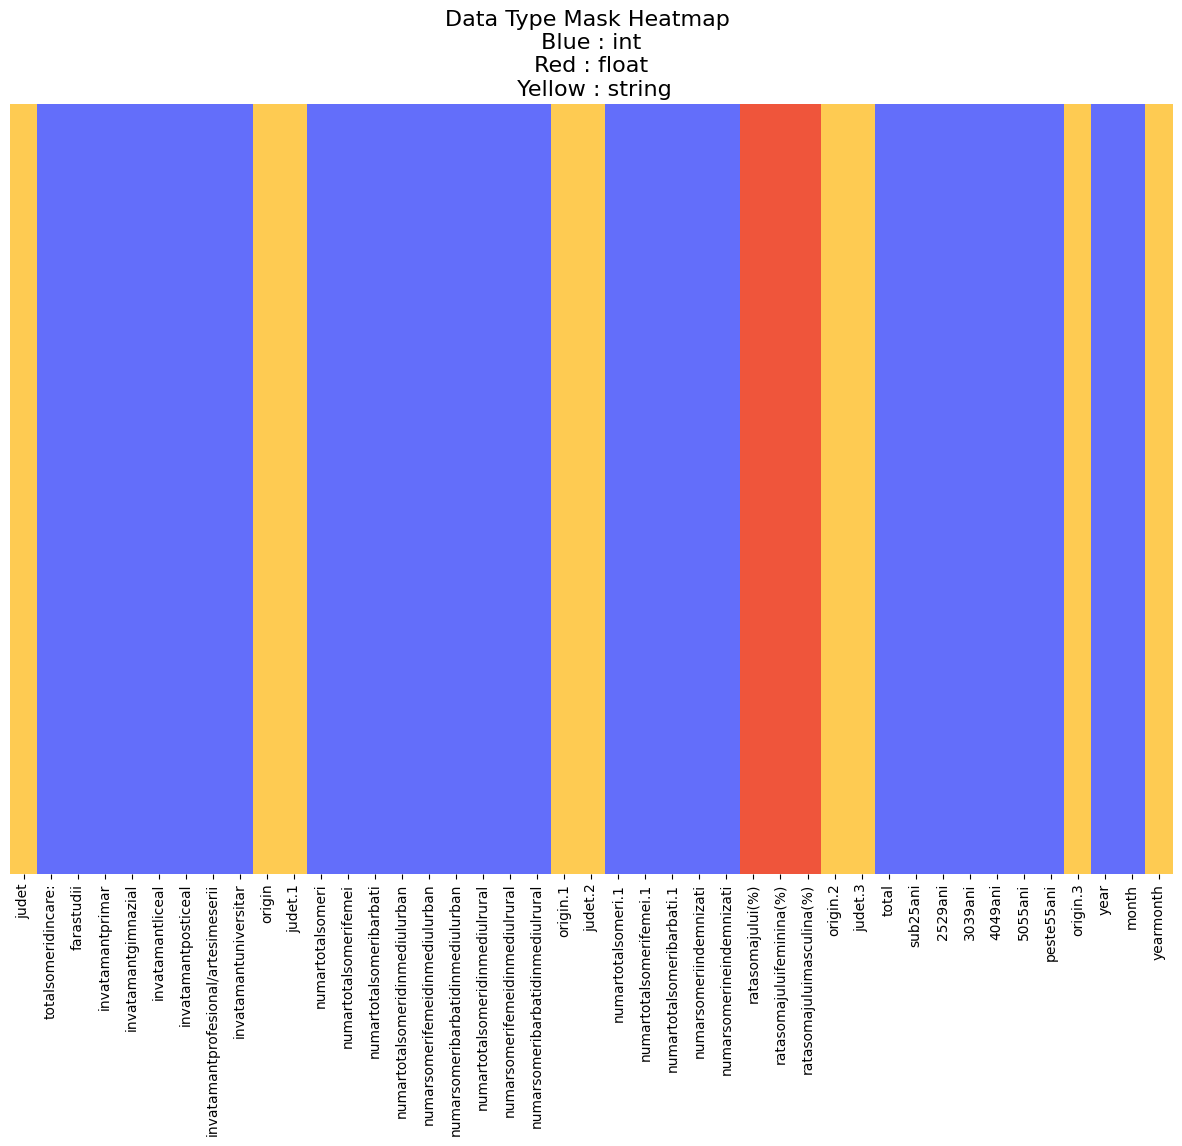

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



# Create a mask for the entire DataFrame based on data types
mask = all_data.applymap(lambda x: 2 if isinstance(x, (float, np.floating))
                  else 1 if isinstance(x, (int, np.integer))
                  else 3)
# 1 for in , 3 for object , 2 for floating

plt.figure(figsize = (15,10))
heatmap = sns.heatmap(mask, yticklabels=False, cbar=False, cmap=['#636EFA', '#EF553B', '#FECB52'])
heatmap.set_title("Data Type Mask Heatmap \n Blue : int \n Red : float \n Yellow : string", fontsize=16)
plt.show()

In [252]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np

# # Assume all_data is your DataFrame

# # Create a mask for the entire DataFrame based on data types
# mask = all_data.applymap(lambda x: 1 if isinstance(x, (float, np.floating))
#                               else 2 if isinstance(x, (np.int32))
#                               else 3 if isinstance(x, (np.int64))
#                               else 4 if isinstance(x, (str))
#                               else 5)  # For any other data type

# # 1 for int, 2 for floating, 3 for string, 4 for int32, 5 for int64, 6 for other
# plt.figure(figsize=(15, 10))
# sns.heatmap(mask, yticklabels=False, cmap='Set3')
# plt.show()


In [253]:
alba_data=all_data[all_data['judet']=='alba']

In [254]:
alba_data.columns

Index(['judet', 'totalsomeridincare:', 'farastudii', 'invatamantprimar',
       'invatamantgimnazial', 'invatamantliceal', 'invatamantposticeal',
       'invatamantprofesional/artesimeserii', 'invatamantuniversitar',
       'origin', 'judet.1', 'numartotalsomeri', 'numartotalsomerifemei',
       'numartotalsomeribarbati', 'numartotalsomeridinmediulurban',
       'numarsomerifemeidinmediulurban', 'numarsomeribarbatidinmediulurban',
       'numartotalsomeridinmediulrural', 'numarsomerifemeidinmediulrural',
       'numarsomeribarbatidinmediulrural', 'origin.1', 'judet.2',
       'numartotalsomeri.1', 'numartotalsomerifemei.1',
       'numartotalsomeribarbati.1', 'numarsomeriindemnizati',
       'numarsomerineindemnizati', 'ratasomajului(%)',
       'ratasomajuluifeminina(%)', 'ratasomajuluimasculina(%)', 'origin.2',
       'judet.3', 'total', 'sub25ani', '2529ani', '3039ani', '4049ani',
       '5055ani', 'peste55ani', 'origin.3', 'year', 'month', 'yearmonth'],
      dtype='object')

In [258]:
import plotly.express as px
fig = px.bar(alba_data[(alba_data['year']>2018) & (alba_data['year']<2023)], x=alba_data[(alba_data['year']>2018) & (alba_data['year']<2023)]['year'], y=['farastudii', 'invatamantprimar',
       'invatamantgimnazial', 'invatamantliceal', 'invatamantposticeal',
       'invatamantprofesional/artesimeserii', 'invatamantuniversitar'], barmode='group',width=2000, 
             height=800,template='plotly_white')
fig.show()

In [265]:
import plotly.express as px
fig = px.histogram(alba_data[(alba_data['year']>2018) & (alba_data['year']<2023)], x=alba_data[(alba_data['year']>2018) & (alba_data['year']<2023)]['year'], y=['farastudii', 'invatamantprimar',
       'invatamantgimnazial', 'invatamantliceal', 'invatamantposticeal',
       'invatamantprofesional/artesimeserii', 'invatamantuniversitar'], barmode='group',width=2000, 
             height=800,template='plotly_white')
fig.show()

In [261]:
import plotly.express as px
fig = px.bar(alba_data[(alba_data['year']>2018) & (alba_data['year']<2023)], x=alba_data[(alba_data['year']>2018) & (alba_data['year']<2023)]['yearmonth'], y=['farastudii', 'invatamantprimar',
       'invatamantgimnazial', 'invatamantliceal', 'invatamantposticeal',
       'invatamantprofesional/artesimeserii', 'invatamantuniversitar'], barmode='stack',width=2000, 
             height=800,template='plotly_white')
fig.show()
#  ['stack', 'group', 'overlay', 'relative']

In [294]:
all_data_2019 = all_data[all_data['year'] == 2019]
average_data = all_data_2019.groupby('judet')['ratasomajului(%)'].mean().reset_index()
# Create a bar chart using Plotly Express
fig = px.bar(average_data, x='judet', y='ratasomajului(%)',
             text='ratasomajului(%)', title="Average 'ratasomajului(%)' in 2019",
             width=2300, height=800, template='plotly_white')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()

In [310]:
all_data_2019 = all_data[all_data['year'] == 2019]

# Group by 'judet' and calculate the average of 'ratasomajului(%)'
average_data = all_data_2019.groupby('judet')['ratasomajului(%)'].mean().reset_index()

# Sort the DataFrame by the average values in descending order
average_data = average_data.sort_values(by='ratasomajului(%)', ascending=False)

# Create a bar chart using Plotly Express
fig = px.bar(average_data, x='judet', y='ratasomajului(%)',
             text='ratasomajului(%)', title="Average 'ratasomajului(%)' in 2019",
             width=2300, height=600, template='plotly_white')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Rotate x-axis labels for better readability
fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [316]:
all_data_2019 = all_data[all_data['year'] == 2019]
average_data = all_data_2019.groupby('judet')['ratasomajului(%)'].mean().reset_index()
average_data = average_data.sort_values(by='ratasomajului(%)', ascending=False)
# Create a bar chart using Plotly Express
fig = px.bar(average_data, y='judet', x='ratasomajului(%)',
             text='ratasomajului(%)', title="Average 'ratasomajului(%)' in 2019",
             width=2300, height=800, template='plotly_white', orientation='h')
fig.update_layout(
    yaxis = dict(autorange="reversed")
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()

In [298]:
df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
all_data[all_data['year']==2019]
fig = px.bar(all_data[all_data['year']==2019], y='ratasomajului(%)', x='judet', text_auto='.2s',
            title="Default: various text sizes, positions and angles",width=2300, 
             height=800,template='plotly_white')
fig.show()

In [281]:
# df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
all_data[all_data['year']==2019]
fig = px.histogram(all_data[(all_data['year']==2019) & (all_data['month']==9)], y='ratasomajului(%)', x='judet', text_auto='.2s',
            title="Default: various text sizes, positions and angles",width=2300, 
             height=800,template='plotly_white')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()